In [51]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [27]:
df = pd.read_csv('olimpicos.csv')

In [78]:
df.head()

,Atleta,Edad,Altura_cm,Peso_kg,Deporte,Entrenamientos_Semanales,Medallas_Totales,Pais
0,Usain Bolt,34,195,94,Atletismo,6,8,Jamaica
1,Simone Biles,26,142,47,Gimnasia,10,7,EE.UU.
2,Michael Phelps,35,193,88,Natación,9,23,EE.UU.
3,Katie Ledecky,27,183,70,Natación,8,10,EE.UU.
4,Nadia Comaneci,45,160,50,Gimnasia,7,5,Rumania


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Atleta                    7 non-null      object
 1   Edad                      7 non-null      int64 
 2   Altura_cm                 7 non-null      int64 
 3   Peso_kg                   7 non-null      int64 
 4   Deporte                   7 non-null      object
 5   Entrenamientos_Semanales  7 non-null      int64 
 6   Medallas_Totales          7 non-null      int64 
 7   Pais                      7 non-null      object
dtypes: int64(5), object(3)
memory usage: 580.0+ bytes


In [10]:
df.describe()

,Edad,Altura_cm,Peso_kg,Entrenamientos_Semanales,Medallas_Totales
count,7.000000,7.000000,7.000000,7.000000,7.000000
mean,35.000000,174.571429,68.428571,7.285714,8.571429
std,6.831301,18.715921,17.614929,1.799471,6.803361
min,26.000000,142.000000,47.000000,5.000000,3.000000
25%,30.500000,167.000000,57.500000,6.000000,4.500000
50%,35.000000,175.000000,65.000000,7.000000,7.000000
75%,39.000000,188.000000,79.000000,8.500000,9.000000
max,45.000000,195.000000,94.000000,10.000000,23.000000


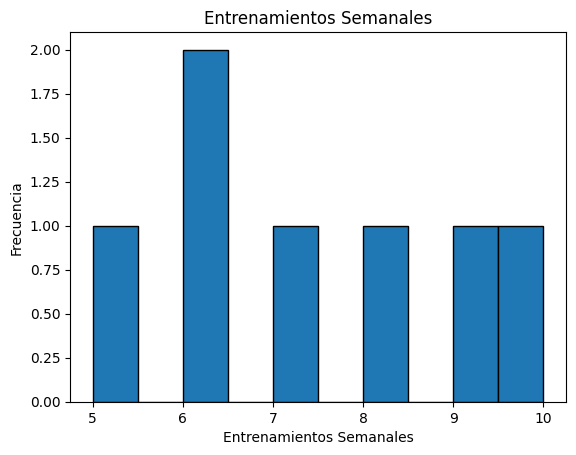

In [18]:
plt.figure()
plt.hist(df['Entrenamientos_Semanales'], bins=10, edgecolor='black')
plt.xlabel('Entrenamientos Semanales')
plt.ylabel('Frecuencia')
plt.title('Entrenamientos Semanales')
plt.show()

**Tipo de variable**

**Atleta:** Categórica nominal || **Edad:** Cuantitativa discreta || **Altura_cm:** Cuantitativa continua || **Peso_kg:** Cuantitativa continua || **Deporte:** Categórica nominal || **Entrenamientos_Semanales:** Cuantitativa discreta || **Medallas_Totales:** Cuantitativa discreta || **Pais:** Categórica nominal

In [80]:
media = np.mean(df['Medallas_Totales'])
mediana = np.median(df['Medallas_Totales'])
moda = stats.mode(df['Medallas_Totales'])

print(f'La media de medallas obtenidas es: {media:.2f}')
print(f'La mediana de medallas obtenidas es: {mediana}')
print(f'La moda de medallas obtenidas es: {moda.mode}')

La media de medallas obtenidas es: 8.57
La mediana de medallas obtenidas es: 7.0
La moda de medallas obtenidas es: 3


El valor obtenido para la **moda = 3** ocurre porque *scipy.stats.mode* encuentra que múltiples valores comparten la frecuencia máxima, y por defecto, devuelve el valor más bajo de esos valores con la frecuencia máxima. En este conjunto de datos todos los valores son únicos, por lo que todos tienen una frecuencia de 1.

In [84]:
desviacion_estandar = np.std(df['Altura_cm'], ddof=1)
print(f'La desviación estándar de la altura de los atletas es: {desviacion_estandar:.2f} cm.')

La desviación estándar de la altura de los atletas es: 18.72 cm.


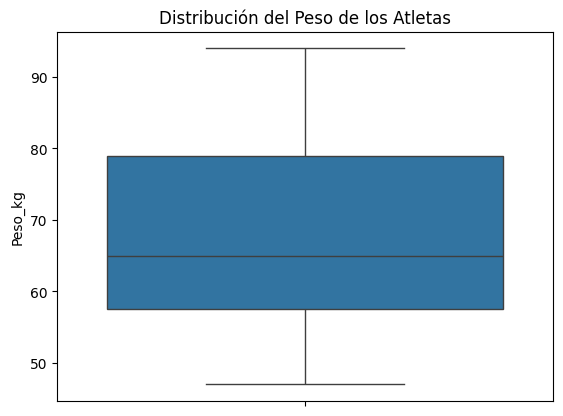

In [40]:
sns.boxplot(y=df['Peso_kg'])
plt.title('Distribución del Peso de los Atletas')
plt.show()

In [85]:
matriz_corr = np.corrcoef(df['Entrenamientos_Semanales'], df['Medallas_Totales'])
print(f'La correlación entre Entrenamientos Semanales y Medallas obtenidas es: {matriz_corr[0, 1]:.2f}')

La correlación entre Entrenamientos Semanales y Medallas obtenidas es: 0.57


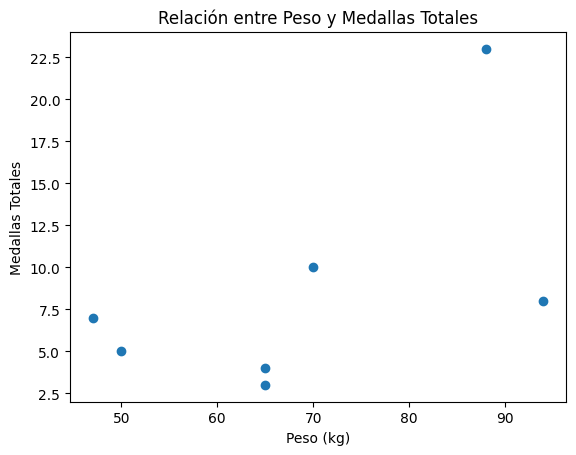

In [45]:
plt.figure()
plt.scatter(df['Peso_kg'], df['Medallas_Totales'])
plt.xlabel('Peso (kg)')
plt.ylabel('Medallas Totales')
plt.title('Relación entre Peso y Medallas Totales')
plt.show()

No parece haber una correlación lineal fuerte y claramente visible entre la variable Peso_kg y Medallas_Totales. Los puntos en el gráfico están bastante dispersos y no siguen una línea ascendente o descendente definida.

In [52]:
X = np.array(df['Entrenamientos_Semanales']).reshape(-1, 1)
Y = np.array(df['Medallas_Totales'])

modelo = LinearRegression()
modelo.fit(X, Y)

b_0 = modelo.intercept_
b_1 = modelo.coef_[0]

Y_pred = modelo.predict(X)

print(f'La ecuación de la recta de regresión es: y = {b_1:.2f}x + {b_0:.2f}')

La ecuación de la recta de regresión es: y = 2.15x + -7.12


El coeficiente b_0 (intercepto en Y) es -7.12 y representa el valor esperado de las Medallas Totales cuando los Entrenamientos Semanales son igual a cero. Un intercepto de -7.12 significaría que un atleta que no realiza entrenamientos semanales tendría un número esperado de medallas de -7.12. Sin embargo, este valor no tiene una interpretación práctica realista en este caso, ya que tener un número negativo de medallas no es posible.

El coeficiente b_1 (la pendiente) es 2.15 e indica el cambio promedio en el número de Medallas Totales por cada aumento de una unidad en los Entrenamientos Semanales, manteniendo todo lo demás constante. En este caso, un coeficiente de 2.15 significa que, en promedio, por cada entrenamiento semanal adicional, se espera que un atleta obtenga aproximadamente 2.15 medallas más.

In [57]:
r2 = r2_score(Y, Y_pred)
print(f'El coeficiente de determinación R² es: {r2:.2f}')

El coeficiente de determinación R² es: 0.32


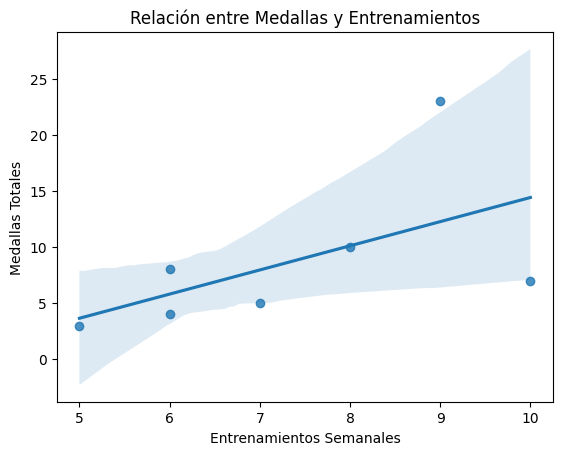

In [61]:
sns.regplot(x=X, y=Y)
plt.xlabel('Entrenamientos Semanales')
plt.ylabel('Medallas Totales')
plt.title('Relación entre Medallas y Entrenamientos')
plt.show()

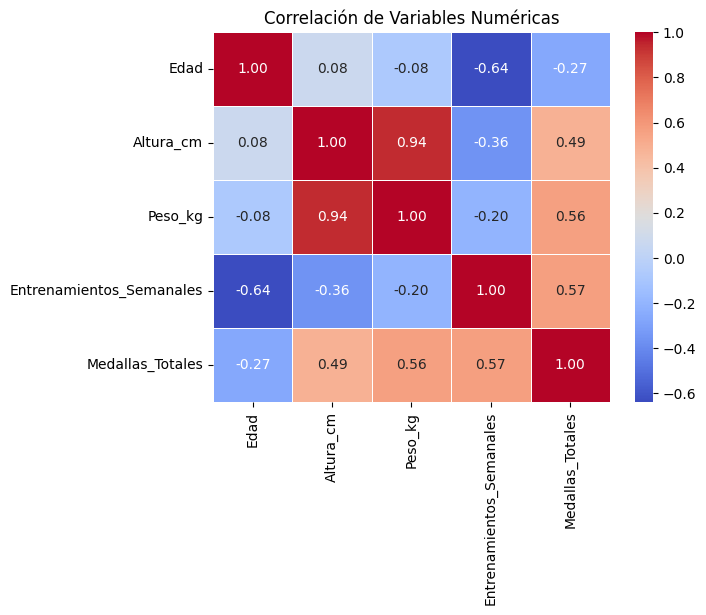

In [77]:
df_numerico = df.select_dtypes(include=np.number)
matriz_corr2 = df_numerico.corr()

plt.figure()
sns.heatmap(matriz_corr2, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlación de Variables Numéricas')
plt.show()

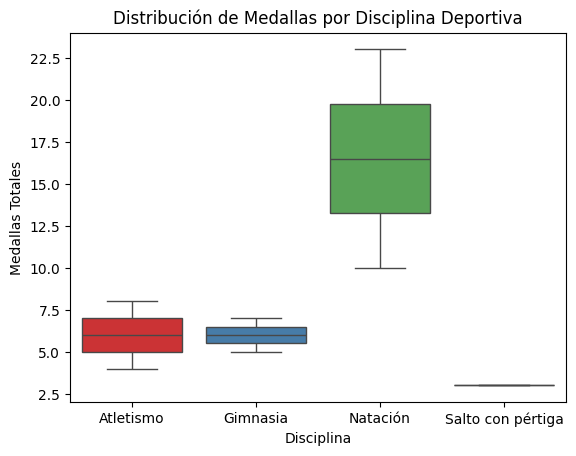

In [76]:
sns.boxplot(x=df['Deporte'], y=df['Medallas_Totales'], data=df, palette='Set1')
plt.xlabel('Disciplina')
plt.ylabel('Medallas Totales')
plt.title('Distribución de Medallas por Disciplina Deportiva')
plt.show()